In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('/home/jovyan/work/src')
import sys
import init
import do_calibration
import read_photometry
import struct
import logging

import importlib
importlib.reload(read_photometry)

%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2
os.chdir('/home/jovyan/work')
logging.getLogger().setLevel(logging.INFO)
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s")


In [3]:
def reject_outliers_2(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/(mdev if mdev else 1.)
    return data[s<m]

100%|██████████| 99/99 [00:02<00:00, 35.85it/s]


[[0.36136447335621535 0.0010093630468686707]]
[]


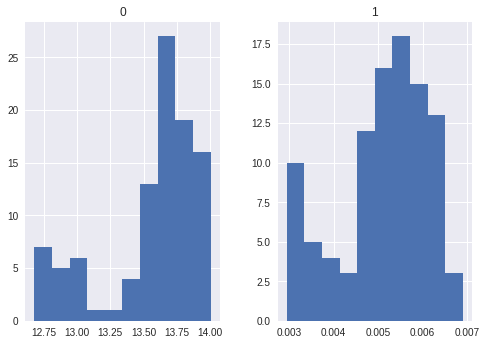

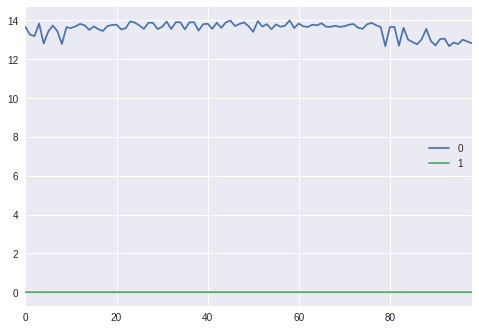

In [10]:
jd, fwhm, result = read_photometry.read_photometry([135], 0)
masked = np.ma.masked_invalid(result)
print(masked.std(axis=0))
print(np.argwhere(np.isnan(masked)))
df = pd.DataFrame(result.reshape(result.shape[0], result.shape[-1]))
df[0:100].hist()
df[0:100].plot()

Stdev for 112 with config 0

In [4]:
jd, fwhm, result = read_photometry.read_photometry([135], 0)



100%|██████████| 900/900 [00:17<00:00, 51.63it/s]


/opt/conda/lib/python3.6/site-packages/numpy/ma/core.py:4206: RuntimeWarning: overflow encountered in multiply
  getdata(other)))


[[-- 0.006155044637160997]]
[]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce9269ac50>]], dtype=object)

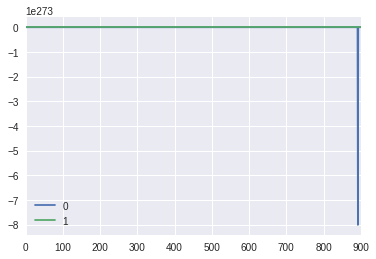

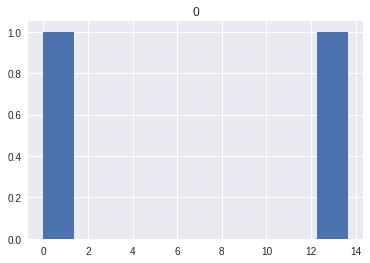

In [5]:
masked = np.ma.masked_invalid(result)
print(masked.std(axis=0))
print(np.argwhere(np.isnan(masked)))
df = pd.DataFrame(result.reshape(result.shape[0], result.shape[-1]))
#df.hist()
df.plot()
df.describe()
result2 = reject_outliers_2(result[0], m = 2.)
df2 = pd.DataFrame(result2)
df2.hist()